In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr , Lasso, Ridge
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

In [3]:
df = pd.read_csv('housing_price_dataset.csv')
df.head(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
x = df.drop(['Price','Address'],axis=1)
y = df['Price']
print(x.head(10))
print(y.head(10))

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   
5      80175.754159             4.988408                   6.104512   
6      64698.463428             6.025336                   8.147760   
7      78394.339278             6.989780                   6.620478   
8      59927.660813             5.362126                   6.393121   
9      81885.927184             4.423672                   8.167688   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3             

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = lr()
model.fit(x_train,y_train)
print("Lr Model Trained Successfully")

rdgModel = Ridge(alpha=10)
rdgModel.fit(x_train,y_train)
print("Ridge Model Trained Successfully")

lasModel = Lasso(alpha=10)
lasModel.fit(x_train,y_train)
print("Lasso Model Trained Successfully")

Lr Model Trained Successfully
Ridge Model Trained Successfully
Lasso Model Trained Successfully


In [16]:
y_pred_lr = model.predict(x_test)
print("First 5 predicted lr values:", y_pred_lr[:5])
print("first 5 test values:",y_test[:5])

y_pred_ridge = rdgModel.predict(x_test)
print("First 5 predicted ridge values:", y_pred_ridge[:5])
print("first 5 test values:",y_test[:5])

y_pred_lasso = lasModel.predict(x_test)
print("First 5 predicted lasso values:", y_pred_lasso[:5])
print("first 5 test values:",y_test[:5])

print("Predictions Made Successfully")

First 5 predicted lr values: [1308587.92699716 1237037.22949393 1243429.34030719 1228900.21360433
 1063320.90710753]
first 5 test values: 1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
Name: Price, dtype: float64
First 5 predicted ridge values: [1308247.79705353 1236554.17709497 1242944.66261404 1228471.95150089
 1064360.22302069]
first 5 test values: 1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
Name: Price, dtype: float64
First 5 predicted lasso values: [1308583.91931594 1237031.1180123  1243431.2231189  1228889.07013194
 1063355.8650722 ]
first 5 test values: 1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
Name: Price, dtype: float64
Predictions Made Successfully


In [17]:
print("Linear Regression Model Evaluation:")
print(f"r2_score = {r2(y_test,y_pred_lr):.4f}")
print(f"Mean Absolute Error = {mae(y_test,y_pred_lr):.4f}")
print(f"Mean Squared Error = {mse(y_test,y_pred_lr):.4f}")

print("\nRidge Regression Model Evaluation:")
print(f"r2_score = {r2(y_test,y_pred_ridge):.4f}")
print(f"Mean Absolute Error = {mae(y_test,y_pred_ridge):.4f}")
print(f"Mean Squared Error = {mse(y_test,y_pred_ridge):.4f}")

print("\nLasso Regression Model Evaluation:")
print(f"r2_score = {r2(y_test,y_pred_lasso):.4f}")
print(f"Mean Absolute Error = {mae(y_test,y_pred_lasso):.4f}")
print(f"Mean Squared Error = {mse(y_test,y_pred_lasso):.4f}")

print("Evaluation Completed Successfully")


Linear Regression Model Evaluation:
r2_score = 0.9180
Mean Absolute Error = 80879.0972
Mean Squared Error = 10089009300.8910

Ridge Regression Model Evaluation:
r2_score = 0.9179
Mean Absolute Error = 80910.2914
Mean Squared Error = 10096318929.5843

Lasso Regression Model Evaluation:
r2_score = 0.9180
Mean Absolute Error = 80879.7193
Mean Squared Error = 10089130528.6225
Evaluation Completed Successfully


Text(0, 0.5, 'Predicted Prices')

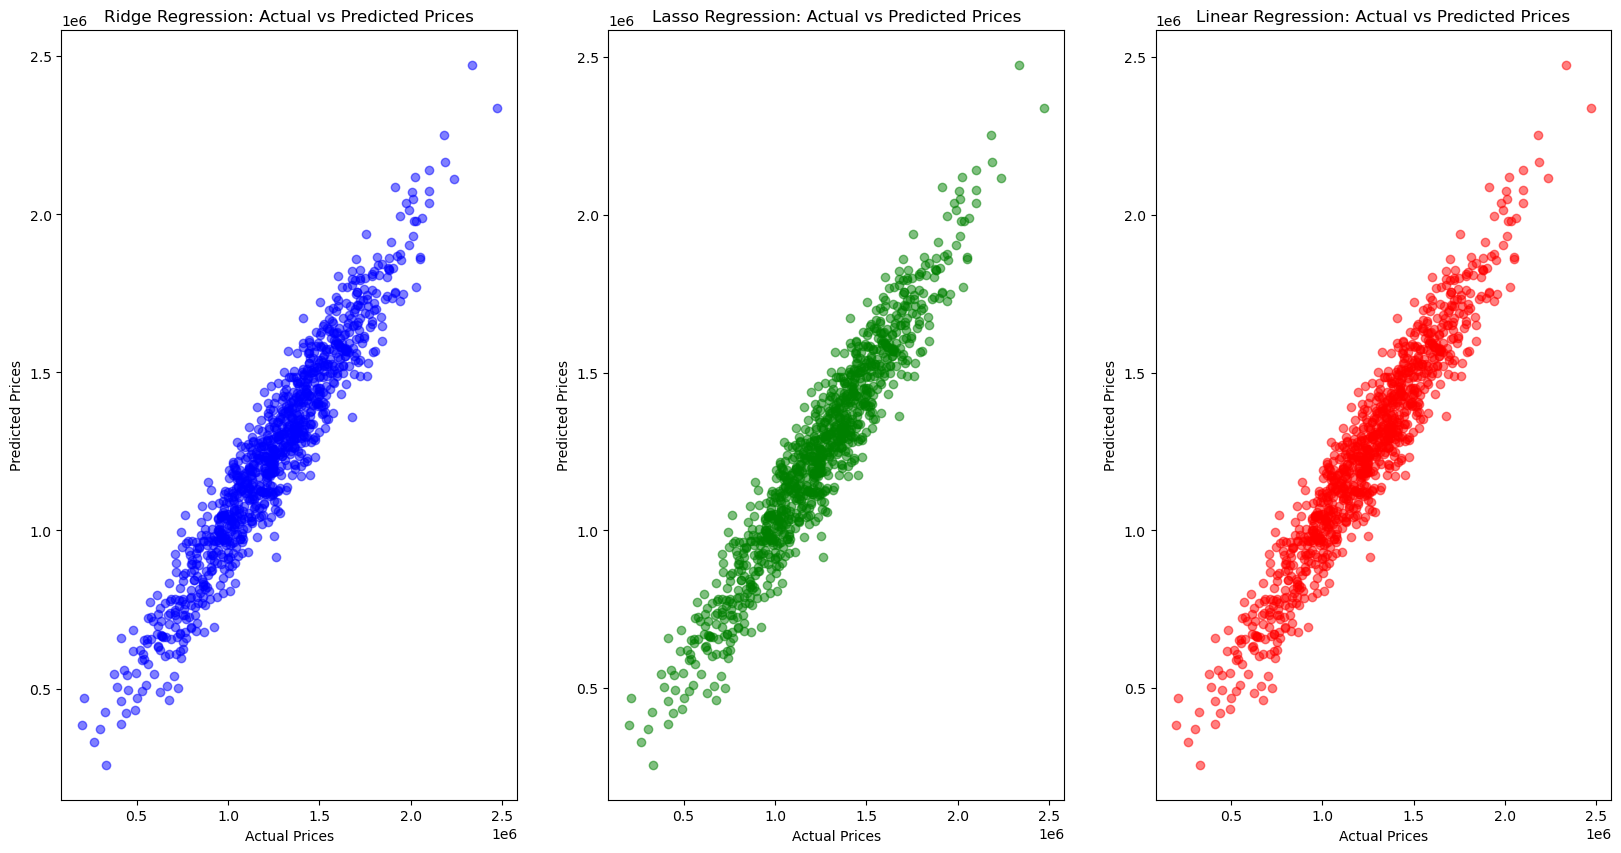

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.scatter(y_test,y_pred_ridge, color = 'blue', alpha=0.5)
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.subplot(1,3,2)
plt.scatter(y_test,y_pred_lasso, color = 'green', alpha=0.5)
plt.title('Lasso Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.subplot(1,3,3)
plt.scatter(y_test,y_pred_lr, color = 'red', alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')